In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (6, 6)

In [3]:
adata = sc.read('../../../pipeline/data/multigrate_mil/mtg3_clean_mild_severe_embed_balanced/d49334e0d7_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 268673 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'
    layers: 'count

In [4]:
sc.set_figure_params(vector_friendly=True)

[<Axes: title={'center': 'Status_on_day_collection_summary'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'initial_clustering'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'cell_attn'}, xlabel='UMAP1', ylabel='UMAP2'>]

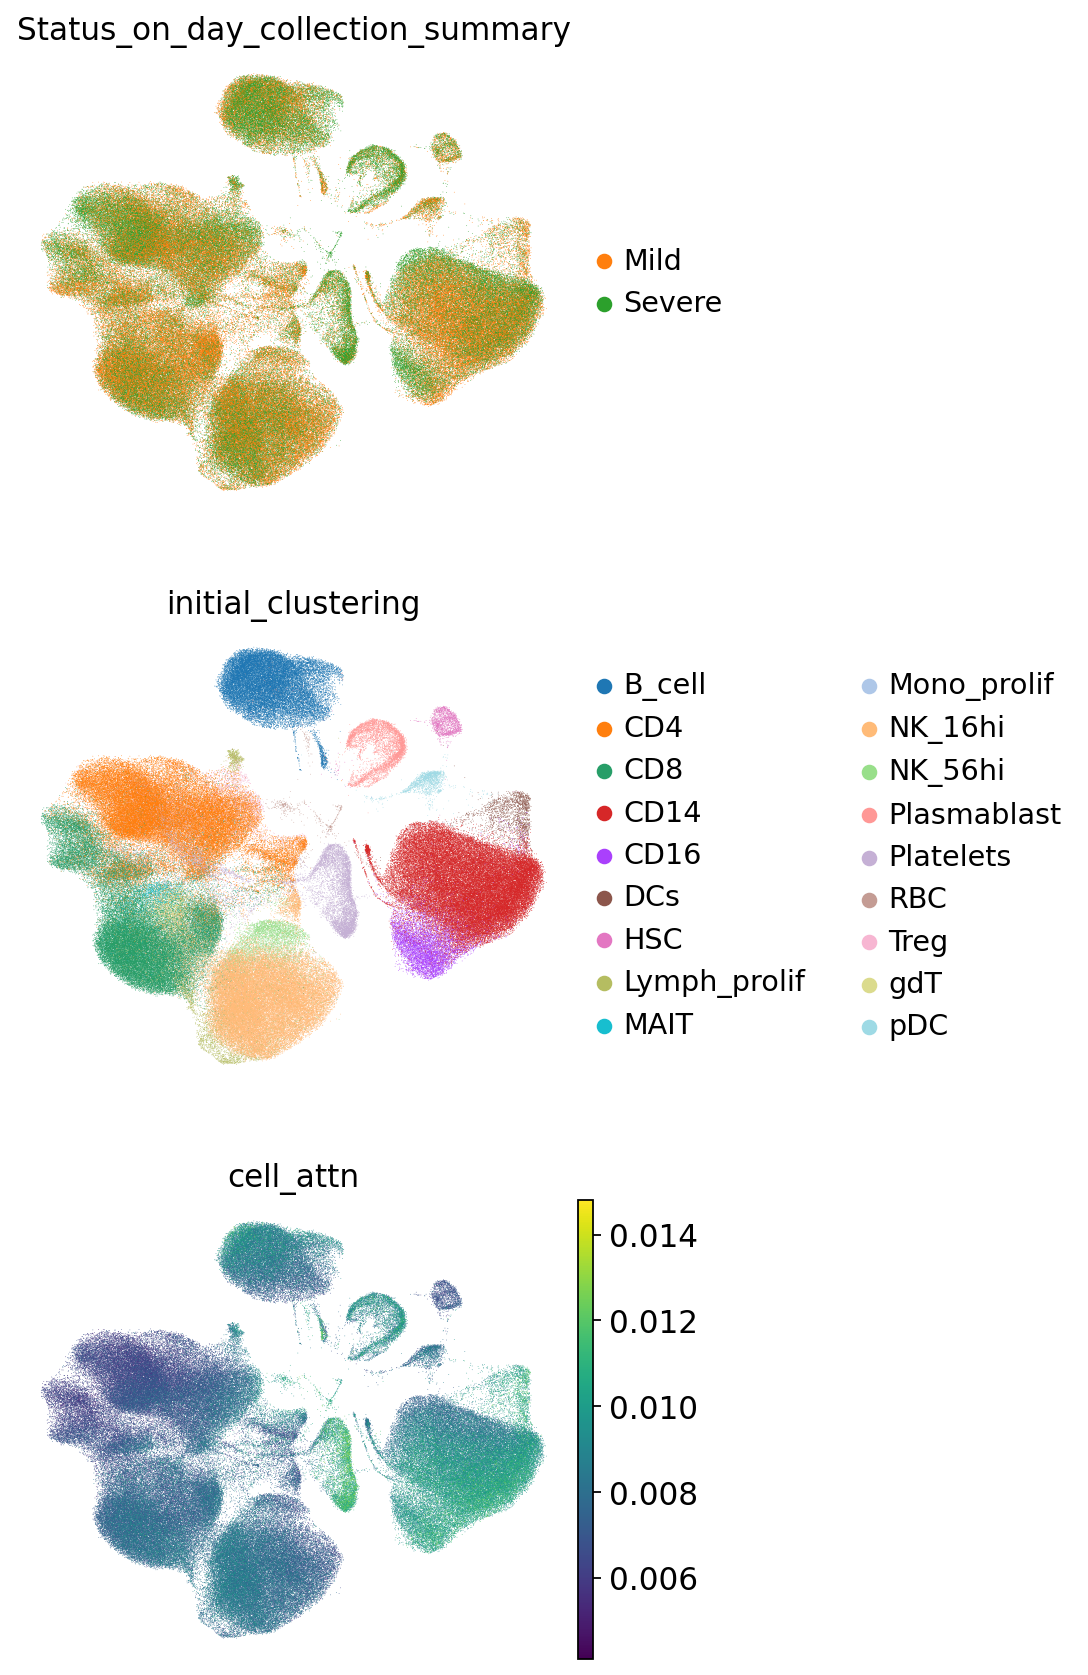

In [5]:
sc.pl.umap(
    adata,
    color=['Status_on_day_collection_summary', 'initial_clustering', 'cell_attn'],
    ncols=1,
    frameon=False,
    show=False,
)

-------- Mild -------


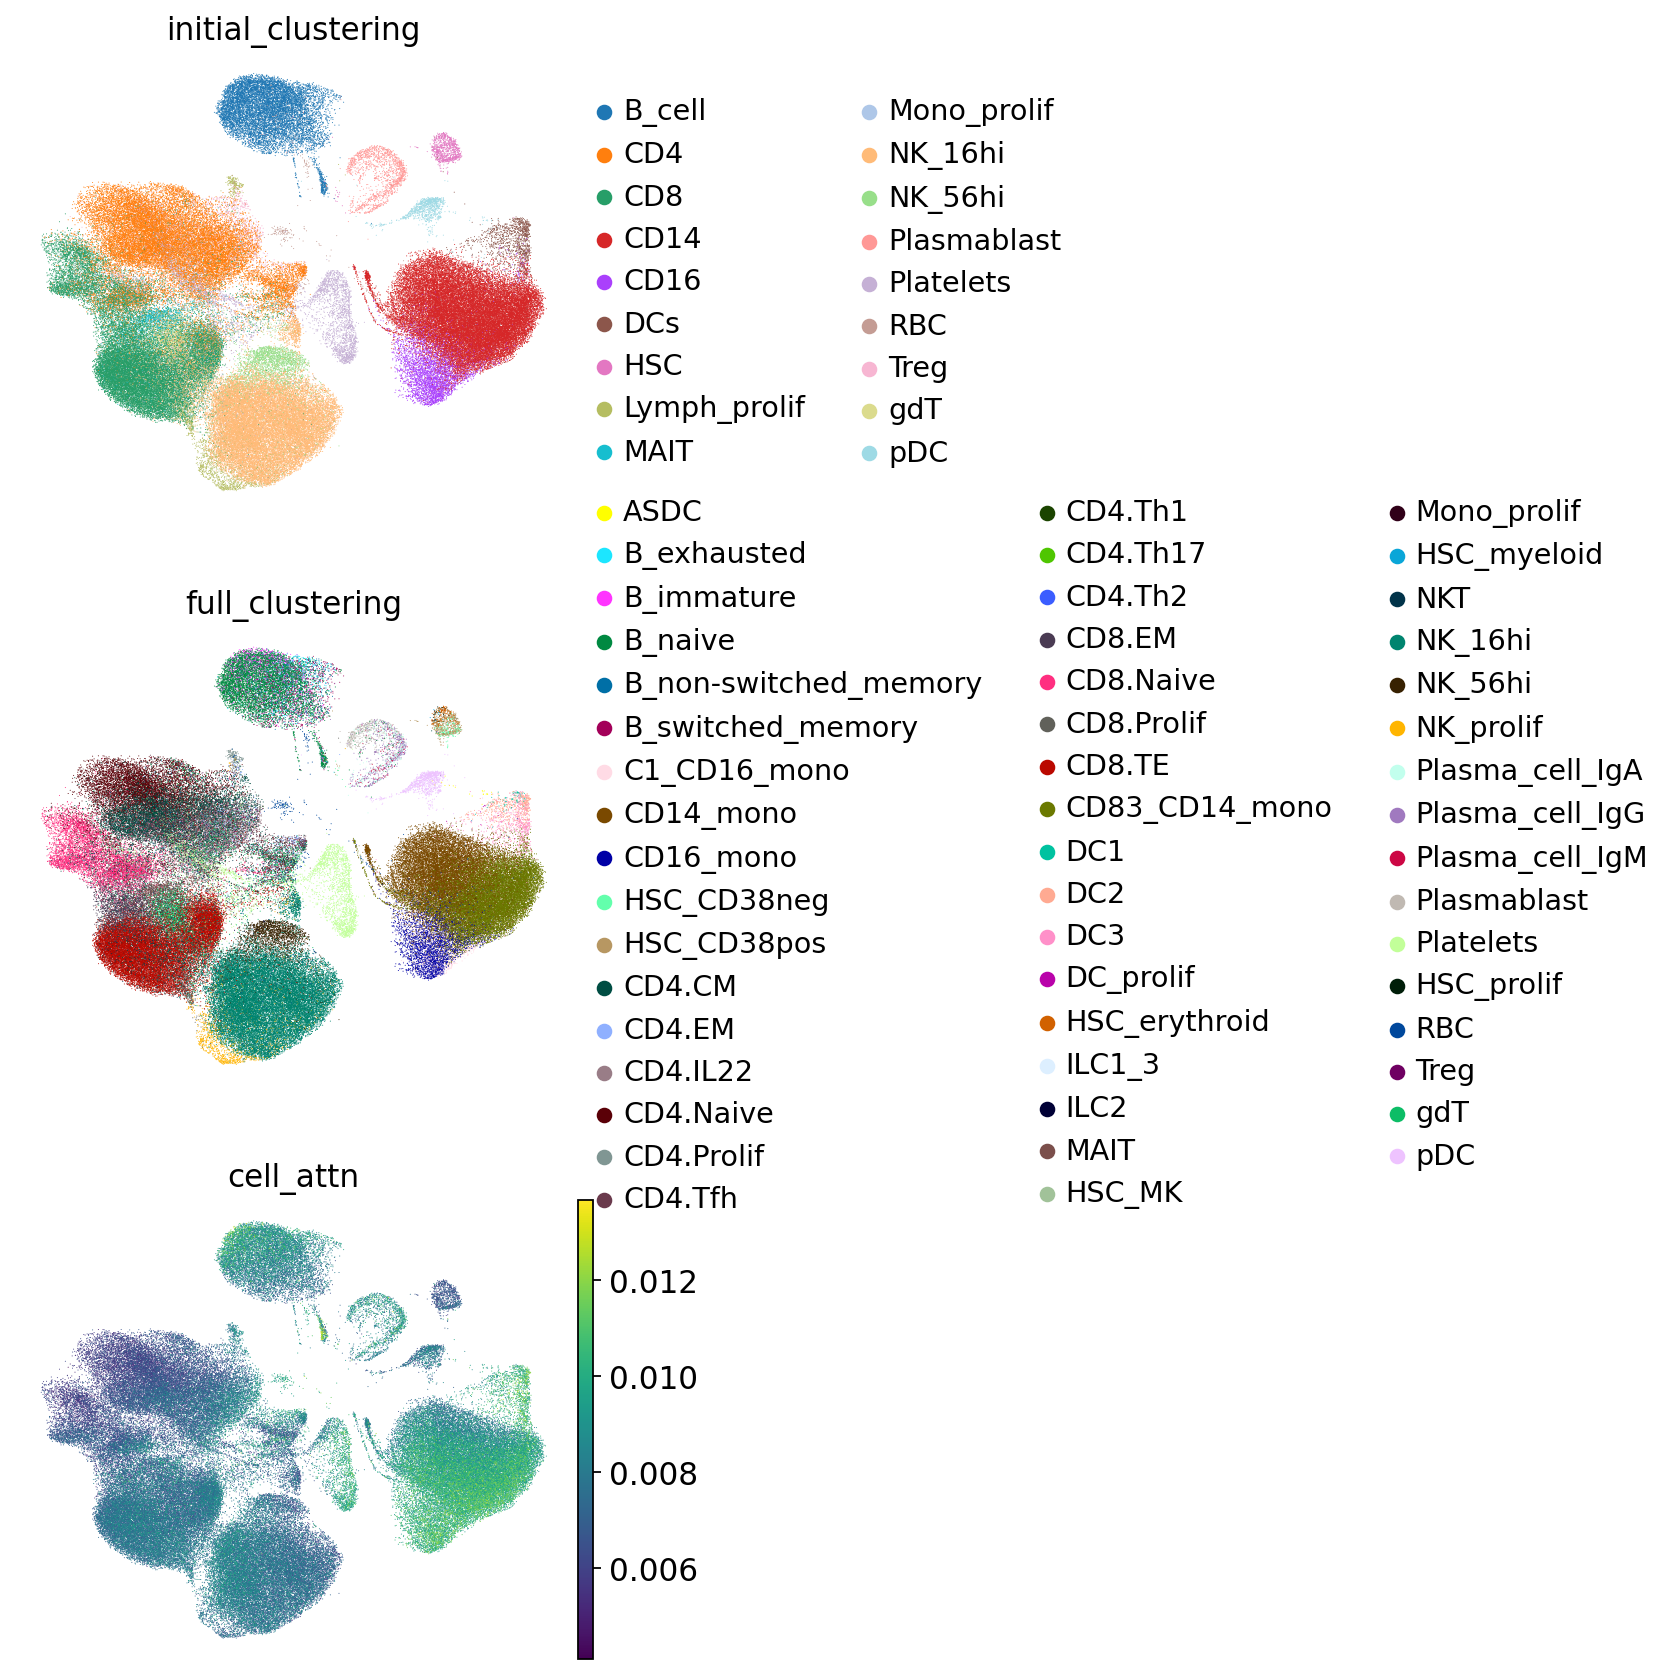

-------- Severe -------


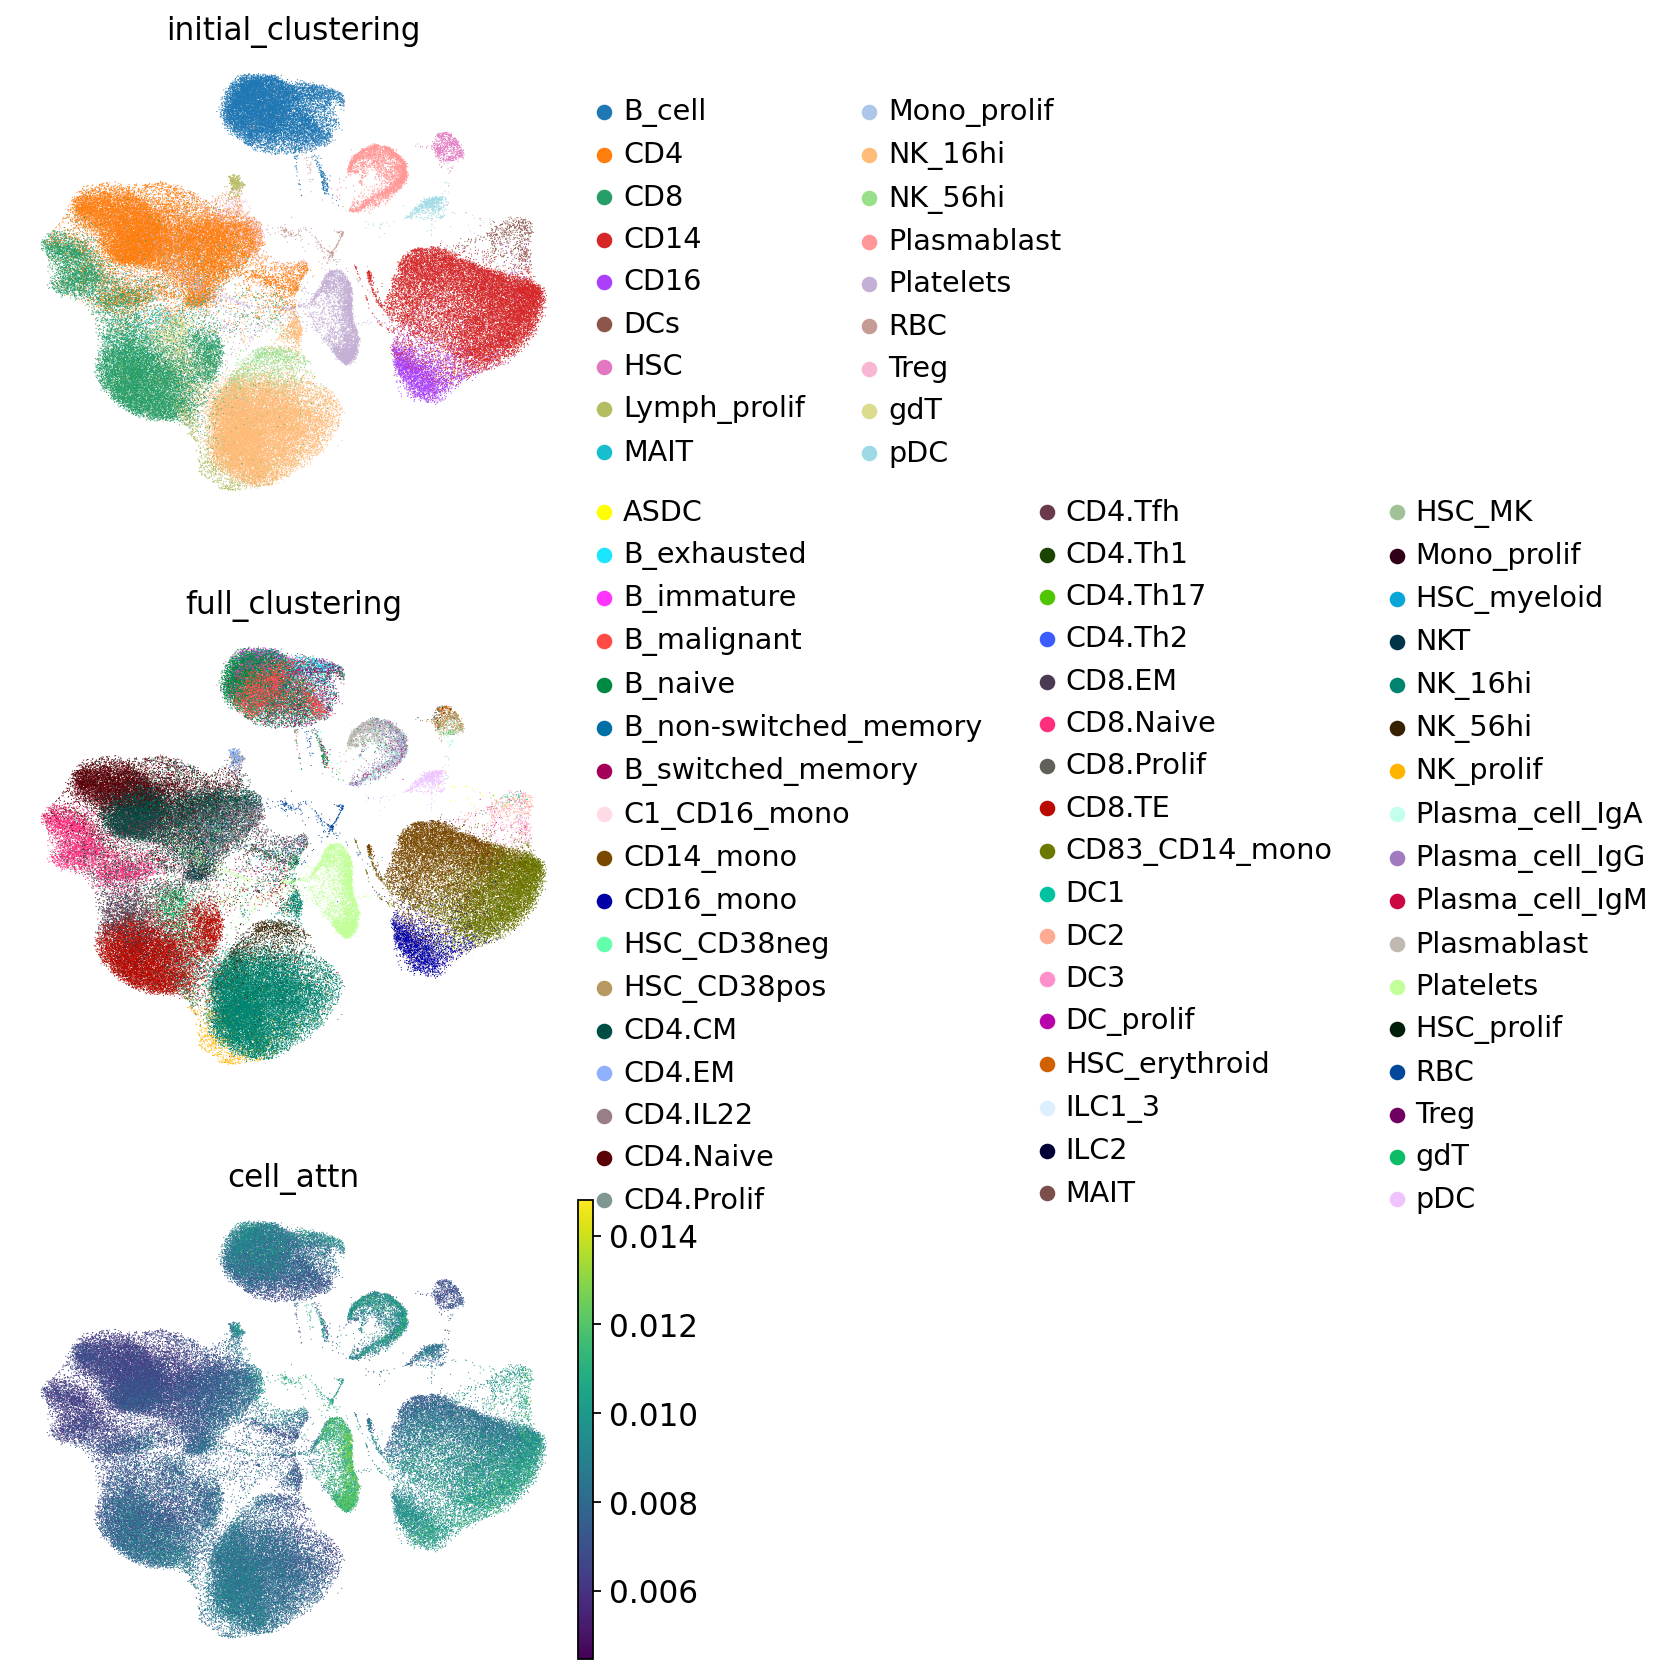

In [6]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    print(f'-------- {cond} -------')
    sc.pl.umap(
        adata_tmp,
        color=['initial_clustering', 'full_clustering', 'cell_attn'],
        ncols=1,
        frameon=False
    )

In [7]:
dfs = []
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

In [8]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, 'top_cells_Severe']

covid_index
AAACCTGAGTTACGGG-MH9143320    True
AAACCTGCATTTGCTT-MH9143320    True
AAACGGGTCGGATGGA-MH9143320    True
AAAGATGAGGGCATGT-MH9143320    True
AAAGATGGTTCCATGA-MH9143320    True
                              ... 
BGCV15_GGTATTGTCCGTAGGC-1     True
BGCV15_GGTGCGTGTTTCGCTC-1     True
BGCV15_GGTGTTAGTAGCTCCG-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TGGTTCCTCTGCTGCT-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

In [9]:
np.sum(adata.obs['top_cells_Severe'] == True)

12328

In [10]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}']

covid_index
AAACCTGAGTTACGGG-MH9143320    True
AAACCTGCATTTGCTT-MH9143320    True
AAACGGGTCGGATGGA-MH9143320    True
AAAGATGAGGGCATGT-MH9143320    True
AAAGATGGTTCCATGA-MH9143320    True
                              ... 
BGCV15_GGTATTGTCCGTAGGC-1     True
BGCV15_GGTGCGTGTTTCGCTC-1     True
BGCV15_GGTGTTAGTAGCTCCG-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TGGTTCCTCTGCTGCT-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

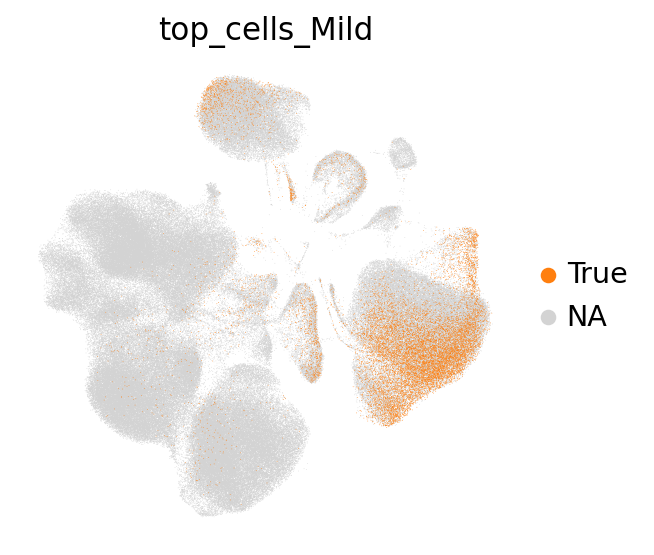

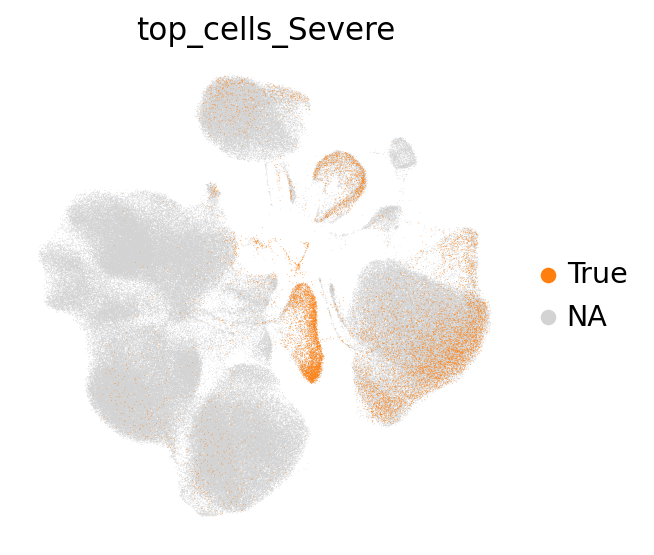

In [11]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [12]:
df = pd.concat(dfs)
df

initial_clustering Status_on_day_collection_summary
covid_index                                                                   
AAACCTGAGAGCTGGT-MH9143327               CD14                             Mild
AAACCTGGTAGAGGAA-MH9143327               CD14                             Mild
AAACCTGTCACAATGC-MH9143327               CD14                             Mild
AAACCTGTCTGCTTGC-MH9143327             B_cell                             Mild
AAACGGGAGTTACGGG-MH9143327               CD14                             Mild
...                                       ...                              ...
BGCV15_GGTATTGTCCGTAGGC-1             NK_16hi                           Severe
BGCV15_GGTGCGTGTTTCGCTC-1        Lymph_prolif                           Severe
BGCV15_GGTGTTAGTAGCTCCG-1        Lymph_prolif                           Severe
BGCV15_GTTCTCGGTACCCAAT-1         Plasmablast                           Severe
BGCV15_TGGTTCCTCTGCTGCT-1                CD14                           Severe

[26869 rows x 2 columns]

In [13]:
df_group = df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group

Status_on_day_collection_summary  initial_clustering
Mild                              CD14                  59.060587
                                  CD16                  15.342824
                                  B_cell                 7.661096
                                  DCs                    5.075304
                                  Platelets              4.669555
                                  Plasmablast            1.643628
                                  CD4                    1.609243
                                  RBC                    1.574857
                                  CD8                    1.024689
                                  NK_16hi                0.949041
                                  gdT                    0.323224
                                  Treg                   0.281961
                                  MAIT                   0.206313
                                  pDC                    0.199436
                       

In [14]:
df_group = df_group.unstack().reindex(['Mild', 'Severe'])

In [15]:
df_group

initial_clustering                  B_cell       CD4       CD8       CD14  \
Status_on_day_collection_summary                                            
Mild                              7.661096  1.609243  1.024689  59.060587   
Severe                            5.110318  1.184296  1.573653  34.555483   

initial_clustering                     CD16       DCs       HSC  Lymph_prolif  \
Status_on_day_collection_summary                                                
Mild                              15.342824  5.075304  0.061894      0.103157   
Severe                            10.545101  3.674562  0.032446      0.859831   

initial_clustering                    MAIT  Mono_prolif   NK_16hi   NK_56hi  \
Status_on_day_collection_summary                                              
Mild                              0.206313     0.061894  0.949041  0.151296   
Severe                            0.032446     0.016223  2.190136  0.202790   

initial_clustering                Plasmablast  Platelets       RBC      Treg  \
Status_on_day_collection_summary                                               
Mild                                 1.643628   4.669555  1.574857  0.281961   
Severe                               8.054835  28.552888  2.611940  0.365023   

initial_clustering                     gdT       pDC  
Status_on_day_collection_summary                      
Mild                              0.323224  0.199436  
Severe                            0.081116  0.356911

In [16]:
color = []
for ct in df_group.columns:
    idx = list(adata.obs['initial_clustering'].cat.categories).index(ct)
    color.append(adata.uns['initial_clustering_colors'][idx])
len(color)

18

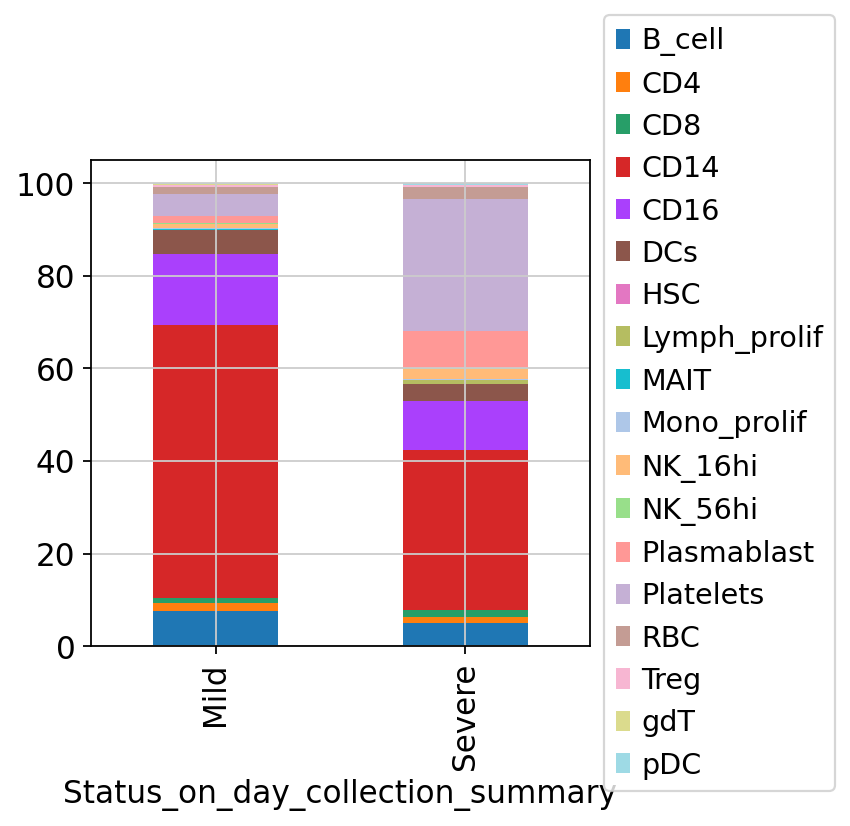

In [17]:
# top 10%
df_group.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [18]:
df_group2 = adata.obs[['Status_on_day_collection_summary', 'initial_clustering']].groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group2

Status_on_day_collection_summary  initial_clustering
Mild                              CD14                  22.272887
                                  CD8                   18.846500
                                  CD4                   17.576220
                                  NK_16hi               17.287364
                                  B_cell                 7.112056
                                  CD16                   3.048122
                                  Platelets              2.526117
                                  NK_56hi                1.803977
                                  Treg                   1.724197
                                  gdT                    1.560512
                                  Lymph_prolif           1.426400
                                  Plasmablast            1.038507
                                  MAIT                   1.026815
                                  DCs                    0.874134
                       

In [19]:
df_group2 = df_group2.unstack().reindex(['Mild', 'Severe'])

In [20]:
df_group2

initial_clustering                   B_cell        CD4        CD8       CD14  \
Status_on_day_collection_summary                                               
Mild                               7.112056  17.576220  18.846500  22.272887   
Severe                            12.182004  22.448731  15.091018  15.602083   

initial_clustering                    CD16       DCs       HSC  Lymph_prolif  \
Status_on_day_collection_summary                                               
Mild                              3.048122  0.874134  0.623104       1.42640   
Severe                            2.707833  0.564605  0.579207       1.29632   

initial_clustering                    MAIT  Mono_prolif    NK_16hi   NK_56hi  \
Status_on_day_collection_summary                                               
Mild                              1.026815     0.042641  17.287364  1.803977   
Severe                            0.586508     0.081933  16.205627  1.460186   

initial_clustering                Plasmablast  Platelets       RBC      Treg  \
Status_on_day_collection_summary                                               
Mild                                 1.038507   2.526117  0.518566  1.724197   
Severe                               2.860341   4.234538  0.449413  2.113213   

initial_clustering                     gdT       pDC  
Status_on_day_collection_summary                      
Mild                              1.560512  0.691880  
Severe                            0.992926  0.543514

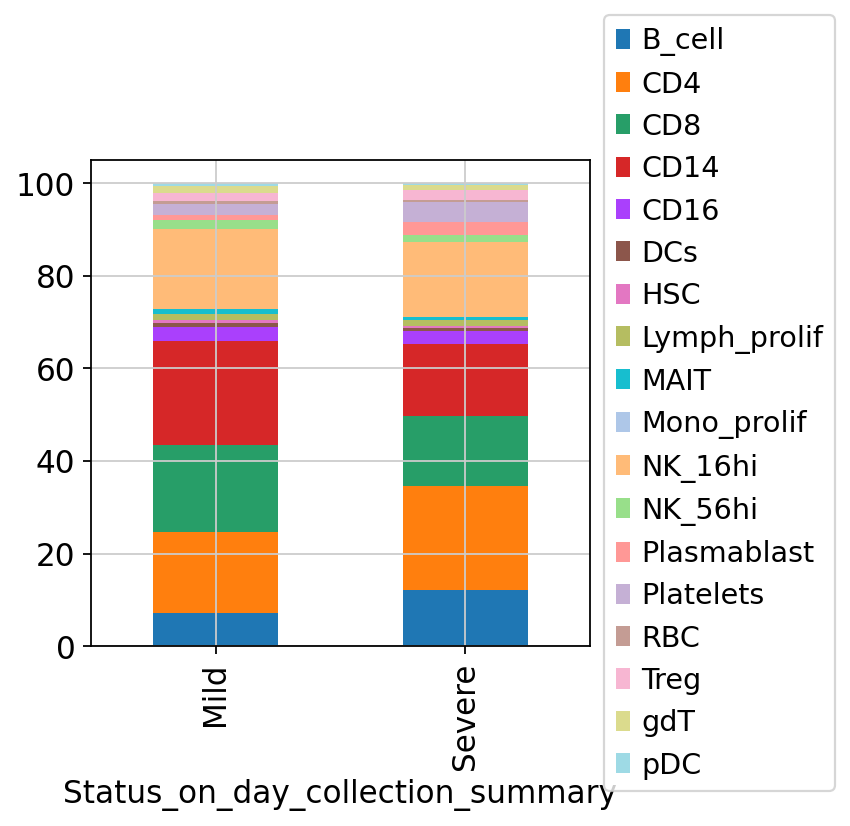

In [21]:
# all
df_group2.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [22]:
mono = adata[adata.obs['initial_clustering'] == 'CD14'].copy()
mono

AnnData object with n_obs × n_vars = 51618 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
    obsm: 'X_umap', '_scvi_extra_categorical_covs'

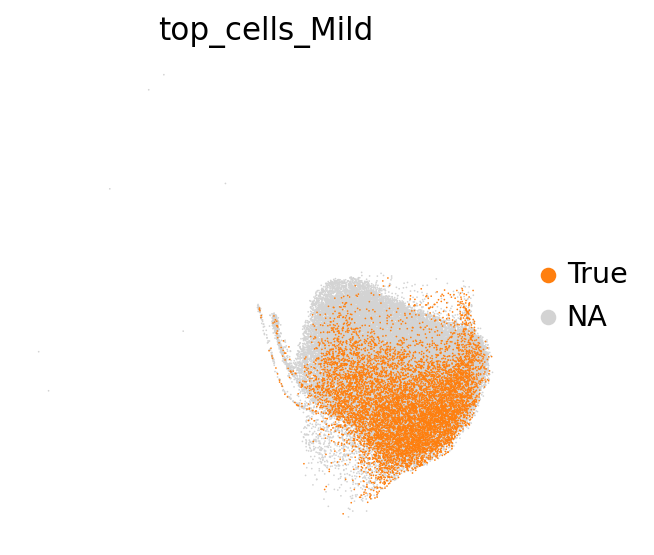

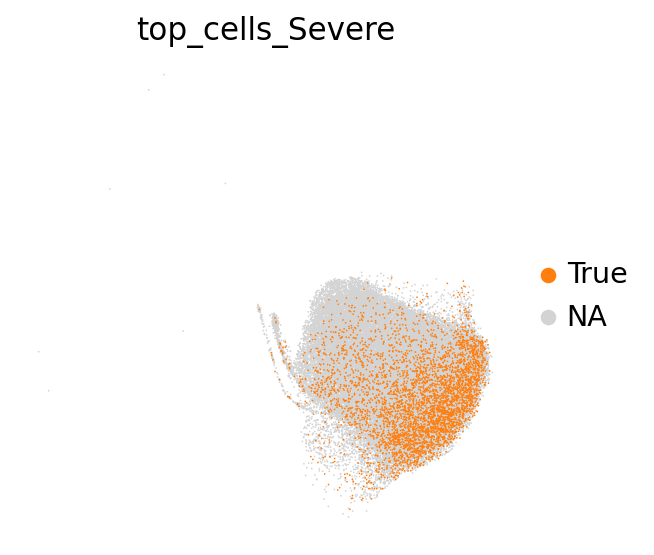

In [23]:
for cond in np.unique(mono.obs['Status_on_day_collection_summary']):
    sc.pl.umap(mono, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

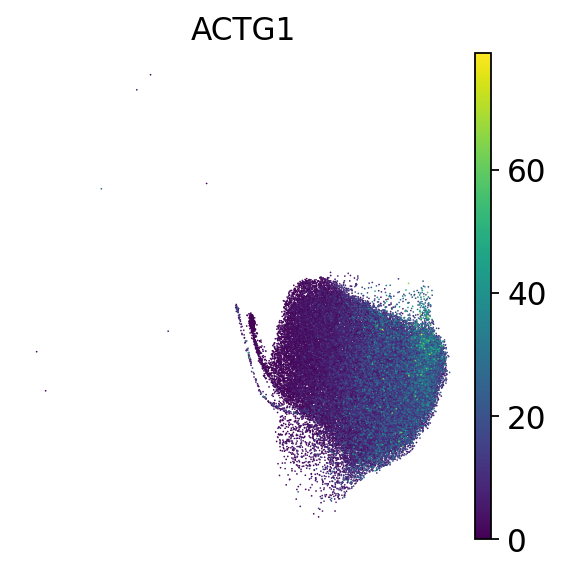

In [24]:
sc.pl.umap(mono, color=['ACTG1'], frameon=False)

In [34]:
plat = adata[adata.obs['initial_clustering'] == 'Platelets'].copy()
plat

AnnData object with n_obs × n_vars = 8893 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
    obsm: 'X_umap', '_scvi_extra_categorical_covs',

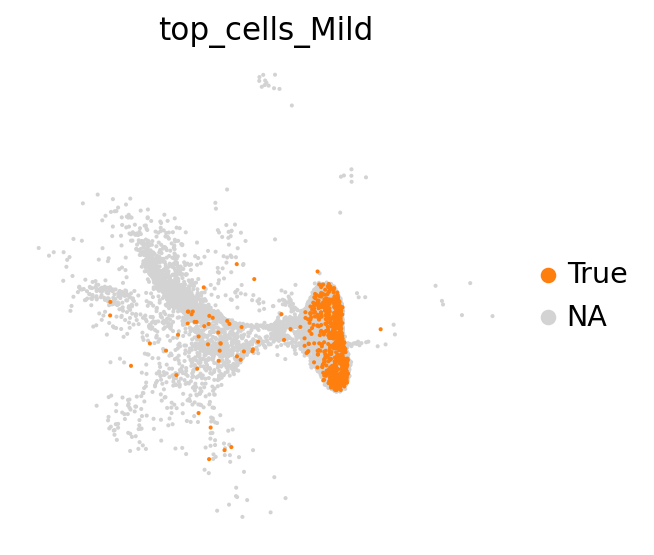

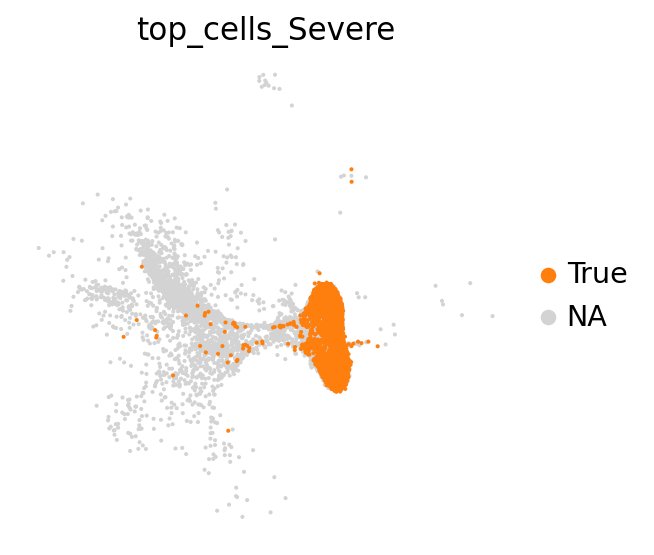

In [35]:
for cond in np.unique(plat.obs['Status_on_day_collection_summary']):
    sc.pl.umap(plat, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [36]:
mono16 = adata[adata.obs['initial_clustering'].isin(['CD16'])].copy()
mono16

AnnData object with n_obs × n_vars = 7770 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
    obsm: 'X_umap', '_scvi_extra_categorical_covs',

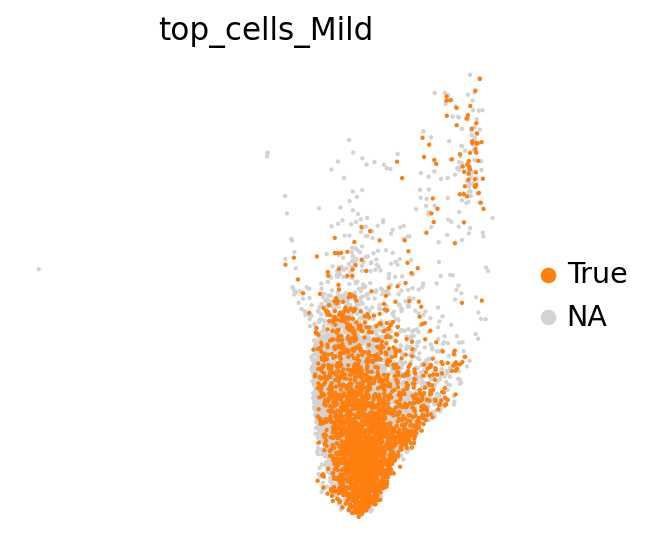

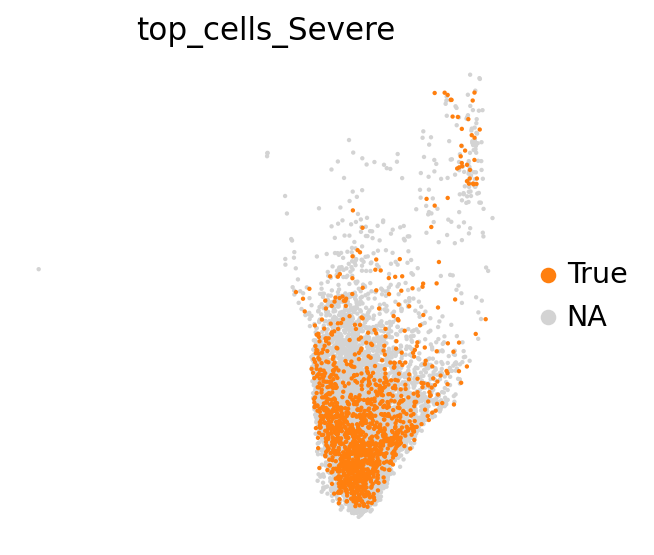

In [37]:
for cond in np.unique(mono16.obs['Status_on_day_collection_summary']):
    sc.pl.umap(mono16, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [38]:
plas = adata[adata.obs['initial_clustering'] == 'Plasmablast'].copy()
plas

AnnData object with n_obs × n_vars = 5036 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
    obsm: 'X_umap', '_scvi_extra_categorical_covs',

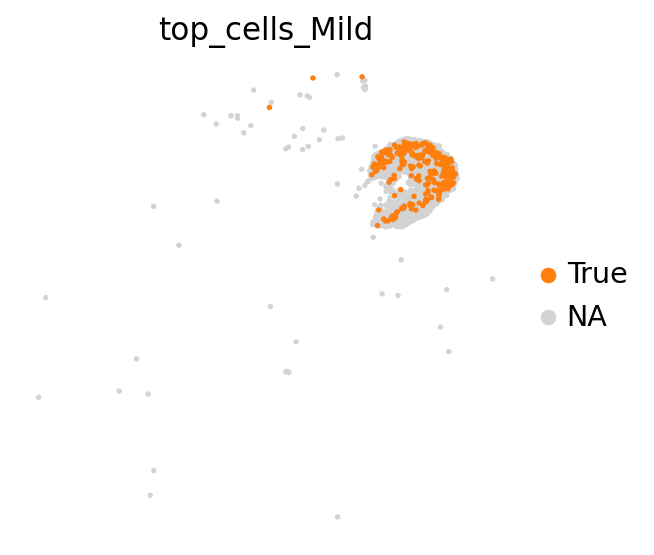

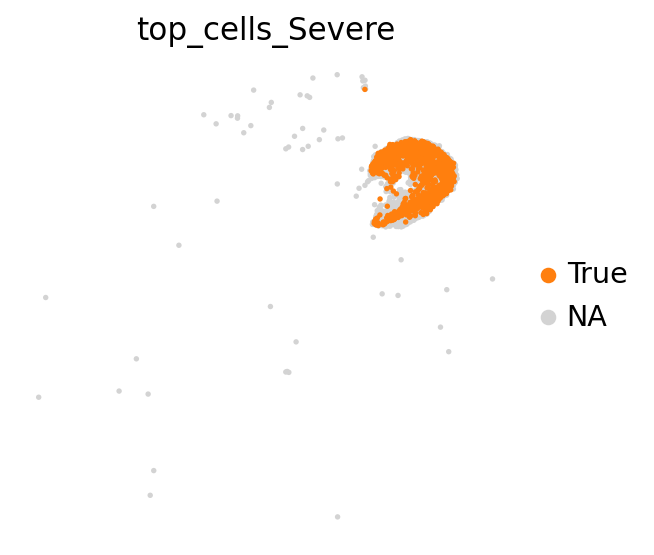

In [39]:
for cond in np.unique(plas.obs['Status_on_day_collection_summary']):
    sc.pl.umap(plas, color=[f'top_cells_{cond}'], groups=[True], frameon=False)